<a href="https://colab.research.google.com/github/Jaksta1/Uczenie_Maszynowe_2025/blob/main/Jakub_Kownacki_praca_domowa_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------
#1. Generowanie danych
-----------------------------------------------

In [1]:
# Importujemy biblioteki
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# Generujemy dane (koncentryczne okręgi)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y = np.where(y == 0, -1, 1)  # Konwersja etykiet na {-1, 1}

------------------------------------------------------------
# 2. Trenowanie SVM z jądrem wielomianowym drugiego stopnia
------------------------------------------------------------

In [2]:
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
clf.fit(X, y)

SVC(coef0=0, degree=2, gamma=1, kernel='poly')

---------------------------------------------------
#3.Wizualizacja wyników
---------------------------------------------------

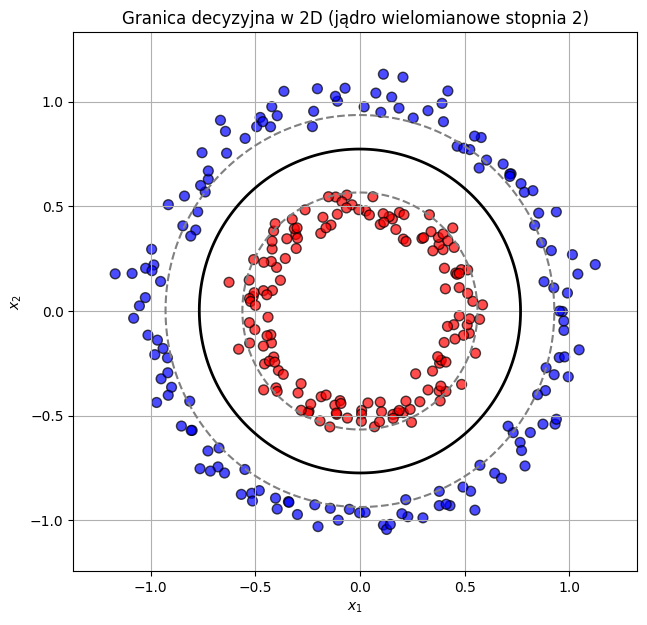

In [3]:
# Tworzymy siatkę dla wizualizacji w 2D
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid).reshape(xx.shape)

# Wykres 2D z granicą decyzyjną
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')
plt.title('Granica decyzyjna w 2D (jądro wielomianowe stopnia 2)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()


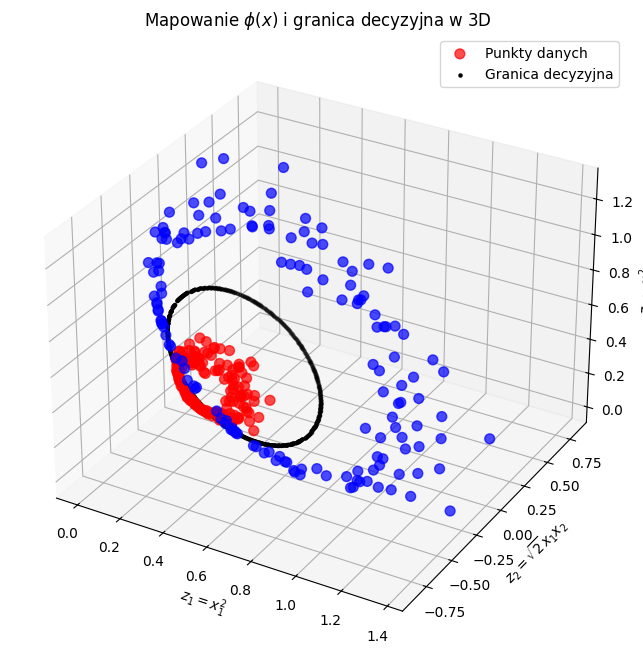

In [4]:
# Definiujemy mapowanie phi(x)
def phi(x):
    return np.array([x[0]**2, np.sqrt(2) * x[0] * x[1], x[1]**2])

# Przekształcamy dane i siatkę do przestrzeni 3D
phi_X = np.array([phi(x) for x in X])
phi_grid = np.array([phi(x) for x in grid])

# Wykres 3D z przekształconymi danymi i granicą decyzyjną
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', s=50, alpha=0.7, label='Punkty danych')
contour_mask = np.isclose(clf.decision_function(grid), 0, atol=0.01)
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Granica decyzyjna')
ax.set_xlabel('$z_1 = x_1^2$')
ax.set_ylabel('$z_2 = \sqrt{2} x_1 x_2$')
ax.set_zlabel('$z_3 = x_2^2$')
ax.set_title('Mapowanie $\phi(x)$ i granica decyzyjna w 3D')
ax.legend()
plt.show()

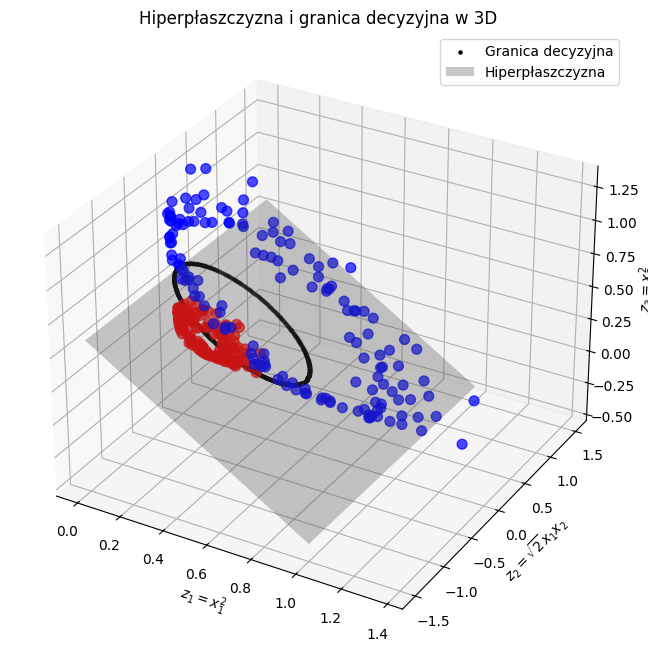

In [5]:
# Obliczamy hiperpłaszczyznę w przestrzeni 3D
sv = clf.support_vectors_
alpha_y = clf.dual_coef_[0]
phi_sv = np.array([phi(x) for x in sv])
w = np.sum(alpha_y[:, np.newaxis] * phi_sv, axis=0)
b = clf.intercept_[0]

# Tworzymy siatkę dla hiperpłaszczyzny
z1 = np.linspace(0, 1, 50)
z2 = np.linspace(-1.5, 1.5, 50)
z1, z2 = np.meshgrid(z1, z2)
z3 = -(w[0] * z1 + w[1] * z2 + b) / w[2] if w[2] != 0 else np.zeros_like(z1)

# Wykres 3D z hiperpłaszczyzną
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', s=50, alpha=0.7)
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Granica decyzyjna')
ax.plot_surface(z1, z2, z3, alpha=0.3, color='gray', label='Hiperpłaszczyzna')
ax.set_xlabel('$z_1 = x_1^2$')
ax.set_ylabel('$z_2 = \sqrt{2} x_1 x_2$')
ax.set_zlabel('$z_3 = x_2^2$')
ax.set_title('Hiperpłaszczyzna i granica decyzyjna w 3D')
ax.legend()
plt.show()

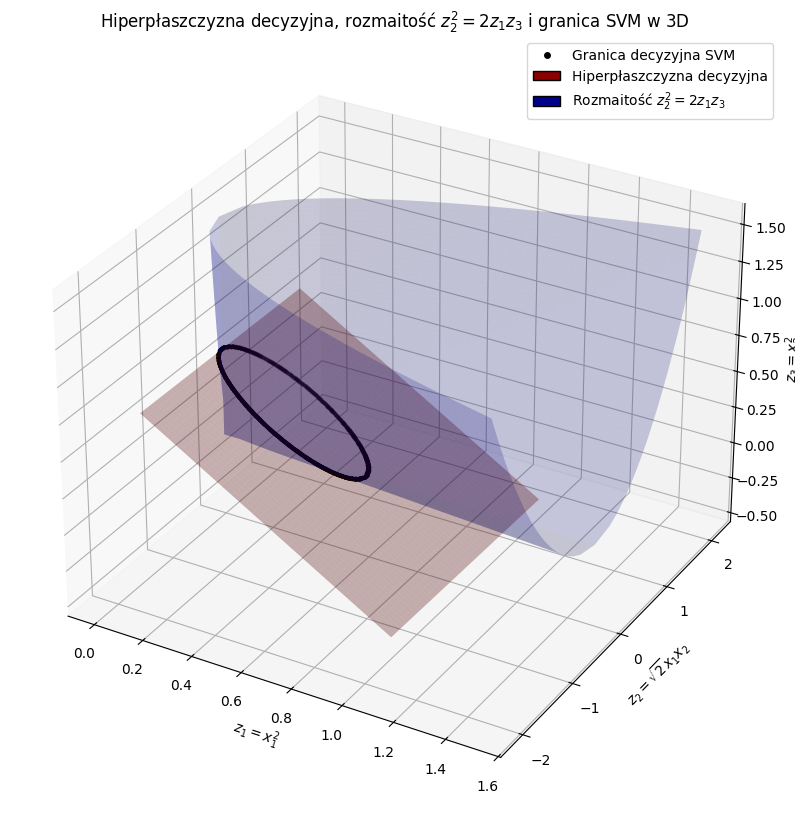

In [6]:
# Wykres z hiperpłaszczyzną, rozmaitością i granicą decyzyjną
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Granica decyzyjna SVM
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Granica decyzyjna SVM')

# Hiperpłaszczyzna decyzyjna
ax.plot_surface(z1, z2, z3, alpha=0.3, color='darkred')

# Rozmaitość: z2^2 = 2 * z1 * z3
Z1 = np.linspace(0, 1.5, 50)
Z3 = np.linspace(0, 1.5, 50)
Z1, Z3 = np.meshgrid(Z1, Z3)
Z2_pos = np.sqrt(2 * Z1 * Z3)
Z2_neg = -Z2_pos

# Rysujemy rozmaitość
ax.plot_surface(Z1, Z2_pos, Z3, alpha=0.2, color='darkblue')
ax.plot_surface(Z1, Z2_neg, Z3, alpha=0.2, color='darkblue')

# Oznaczenia osi
ax.set_xlabel('$z_1 = x_1^2$')
ax.set_ylabel('$z_2 = \sqrt{2} x_1 x_2$')
ax.set_zlabel('$z_3 = x_2^2$')
ax.set_title('Hiperpłaszczyzna decyzyjna, rozmaitość $z_2^2 = 2 z_1 z_3$ i granica SVM w 3D')

# Legenda niestandardowa
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Granica decyzyjna SVM', markerfacecolor='k', markersize=6),
    Patch(facecolor='darkred', edgecolor='k', label='Hiperpłaszczyzna decyzyjna'),
    Patch(facecolor='darkblue', edgecolor='k', label='Rozmaitość $z_2^2 = 2 z_1 z_3$'),
]
ax.legend(handles=legend_elements)

plt.show()

------------------------------
#Odpowiedź na pytanie główne

##Dlaczego granica decyzyjna SVM w przestrzeni cech o wyższej wymiarowości (3D) nie wygląda jak „płaska” hiperpłaszczyzna, mimo że wiemy, że granica separacyjna klasyfikatora jest matematycznie liniowa w tej przestrzeni?

W metodzie SVM z jądrem wielomianowym drugiego stopnia dane z przestrzeni wejściowej $\mathbb{R}^2$ są mapowane do przestrzeni cech $\mathbb{R}^3$ za pomocą funkcji:
$\phi$ (x) = \begin{bmatrix}
x_1^2 \\
\sqrt{2} x_1 x_2 \\
x_2^2
\end{bmatrix}

W tej przestrzeni SVM znajduje liniową granicę decyzyjną, czyli hiperpłaszczyznę opisaną równaniem:

$w^T \phi(x) + b = 0
\quad \text{gdzie} \quad w = [w_1, w_2, w_3]^T$

W przestrzeni cech (3D) hiperpłaszczyzna ta jest geometrycznie płaska. Jednak na wykresie 3D granica decyzyjna pojawia się jako krzywa, ponieważ punkty $\phi(x)$ nie wypełniają całej przestrzeni $\mathbb{R}^3$, lecz leżą na zakrzywionej rozmaitości zdefiniowanej przez mapowanie $\phi$. Dla:
$\phi(x) = [z_1, z_2, z_3] = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]$

zachodzi relacja:
$z_2^2 = 2 z_1 z_3$

Ta równość opisuje powierzchnię stożkową, na której leżą wszystkie punkty po przekształceniu. Granica decyzyjna SVM w 3D to przecięcie płaskiej hiperpłaszczyzny z tą zakrzywioną powierzchnią. Zatem chociaż hiperpłaszczyzna jest liniowa w przestrzeni cech, to na wizualizacji 3D widzimy jedynie jej przecięcie z zakrzywioną rozmaitością $\phi(x)$, co wygląda jak krzywa (okrąg).

--------------------------------------------------

-------------------------------------
#Odpowiedź na pytanie dodatkowe

##Dlaczego hiperpłaszczyzna w 3D staje się okręgiem (lub elipsą) po rzutowaniu z powrotem na oryginalną płaszczyznę 2D?

W oryginalnej przestrzeni 2D, granica decyzyjna to zbiór punktów $x = [x_1, x_2]^T$, dla których:

$f(x) = w^T \phi(x) + b = 0$

Po podstawieniu mapowania $\phi(x)$ otrzymujemy:

$f(x) = w_1 x_1^2 + w_2 \sqrt{2} x_1 x_2 + w_3 x_2^2 + b = 0$

Jest to równanie kwadratowe w zmiennych $x_1$ i $x_2$, które opisuje krzywą stożkową (np. okrąg, elipsę, parabolę lub hiperbolę), zależnie od współczynników $w_1$, $w_2$, $w_3$ i $b$. Dlatego dla naszego zbioru danych przy rzutowaniu hiperpłaszczyzny w 3D na oryginalną płaszczyznę 2D otrzymujemy, że granica decyzyjna przyjmuje postać okręgu.